In [2]:
# -*- coding: utf-8 -*-
"""
Created on Nov 16  2024
author: Dragoljub Perisic
postupak koji generiÅ¡e fajl za primer
1. 
https://minorplanetcenter.net/db_search/
primer sadrÅ¾i objekte
upit na sajtu
NEOs (Show)
na dana 14.11.2024. 36524 objekata
sa sajta, posle upita, prebaceno u Excel
pa posle iz Excela u CSV (DOS)
file name :
Set005NEOs36524.csv
btw: isti upit na dan 16.11.2024. daje 36539 objekata
ver 0.7 -- iscrtane sve 4 kategorije drugom bojom
ver 0.8 -- sredjivanje koda
ver 0.85 -- ubacena provera preseka kategorija za asteroide .. nadjeno da atens i Apohele imaju presek
ver 0.86 -- ubacena tacna provera za sve cetiri kategorije
"""

'\nCreated on Nov 16  2024\nauthor: Dragoljub Perisic\npostupak koji generiÅ¡e fajl za primer\n1. \nhttps://minorplanetcenter.net/db_search/\nprimer sadrÅ¾i objekte\nupit na sajtu\nNEOs (Show)\nna dana 14.11.2024. 36524 objekata\nsa sajta, posle upita, prebaceno u Excel\npa posle iz Excela u CSV (DOS)\nfile name :\nSet005NEOs36524.csv\nbtw: isti upit na dan 16.11.2024. daje 36539 objekata\nver 0.7 -- iscrtane sve 4 kategorije drugom bojom\nver 0.8 -- sredjivanje koda\nver 0.85 -- ubacena provera preseka kategorija za asteroide .. nadjeno da atens i Apohele imaju presek\nver 0.86 -- ubacena tacna provera za sve cetiri kategorije\n'

In [3]:
import copy

In [4]:
MylistOfSB = []

In [5]:
MylistOfAmor = []
MylistOfApollo = []
MylistOfAtens = []
MylistOfApohele = []

############## klasa za putanjske elemente malog tela


<br>
NEW<br>
1  Argument of Perihelion   -PEmaloomega   -degree<br>
2  Ascending Node           -PEvelikoOmega -degree<br>
3  Inclination              -PEi           -degree<br>
4  Eccentricity             -PEe           -<br>
5  Perihelion Distance      -PEq           -AU<br>
6  Semimajor Axis           -PEa           -AU<br>
7  Mean Anomaly             -PEM           -degree<br>
8  Mean Daily Motion        -PEn           -degree/day   <br>
9  Aphelion Distance        -PEQ           -AU<br>
10 Period                   -PEP           -years<br>
11 Absolute magnitude       -PEH           -mag<br>
PEmaloomega,PEvelikoOmega,PEi,PEe,PEq,PEa,PEM,PEn,PEQ,PEP,PEH<br>


In [8]:
class SmallBody:
  def __init__(self, Name, PEmaloomega,PEvelikoOmega,PEi,PEe,PEq,PEa,PEM,PEn,PEQ,PEP,PEH):
      
      
    self.Name=Name
    self.PEmaloomega= PEmaloomega
    self.PEvelikoOmega=PEvelikoOmega
    self.PEi=PEi  
    self.PEe=PEe 
    self.PEq=PEq     
    self.PEa=PEa
    self.PEM=PEM
    self.PEn=PEn     
    self.PEQ=PEQ
    self.PEP=PEP
    self.PEH=PEH
    
   
  def SBPrint(self):
      print (str(self.PEa) +" "+ str(self.PEe) +" "+  str(self.PEi) +" "+  str(self.PEmaloomega) +" "+  
             str(self.PEvelikoOmega) +" "+str(self.PEM) +" "+str(self.PEn) +" "+  
             str(self.PEq) +" "+  str(self.PEQ) +" "+  str(self.PEP) +" "+  str(self.PEH))
  
      print (str(self.PEmaloomega) +" " +str(self.PEvelikoOmega) +str(self.PEi) +" "+ str(self.PEe) +" "+  str(self.PEi) +" "+  " "+  
             str(self.PEq) +" "+str(self.PEa) +" "+str(self.PEq) +" "+  
             str(self.PEa) +" "+  str(self.PEM) +" "
             +  str(self.PEP) +" "+  str(self.PEH))
    
      
  def SBPrintName(self):
      print (self.Name)
      

##mySmallBodTest = SmallBody("test2",10,0.2,4,5,44,53,0.2,3.1,3.4,5.6,10.2)<br>
##mySmallBodTest.SBPrint()

In [10]:
mySmallBodyTemp = SmallBody("test3",0,0,0,0,0,0,0,0,0,0,0)

In [11]:
import csv

Define a class to hold the string and 11 numbers

In [13]:
class DataRow:
    def __init__(self, label: str, numbers: list):
        self.label = label    # A string label
        self.numbers = numbers  # A list of 11 numbers
    
    def __repr__(self):
        return f"DataRow(label={self.label}, numbers={self.numbers})"

Function to read CSV and load data into instances of DataRow

In [15]:
def load_data_from_csv(file_path):
    data_rows = []
    
    with open(file_path, mode='r') as file:
        csv_reader = csv.reader(file)
        
        # Process each line in the CSV file
        for line_num, row in enumerate(csv_reader, start=1):
            if len(row) < 12:
                print(f"Line {line_num} does not contain a label and 11 numbers: {row}")
                continue
            
            try:
                # First item is the label (string), the rest should be numbers
                label = row[0]
                numbers = [float(item) for item in row[1:]]
                mySmallBodyTemp.Name=row[0]
                mySmallBodyTemp.PEmaloomega=row[1]
                mySmallBodyTemp.PEvelikoOmega=row[2]
                mySmallBodyTemp.PEi=row[3]
                mySmallBodyTemp.PEe=row[4]
                mySmallBodyTemp.PEq=row[5]
                mySmallBodyTemp.PEa=row[6]
                mySmallBodyTemp.PEM=row[7]
                mySmallBodyTemp.PEn=row[8]
                mySmallBodyTemp.PEQ=row[9]
                mySmallBodyTemp.PEP=row[10]
                mySmallBodyTemp.PEH=row[11]
                
                ####mySmallBodyTemp.SBPrintName()
                ####mySmallBodyTemp.SBPrint()
                MylistOfSB.append(SmallBody(row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],
                                      row[9],row[10],row[11]))
                # Check that there are exactly 11 numbers
                if len(numbers) == 11:
                    data_rows.append(DataRow(label, numbers))
                else:
                    print(f"Line {line_num} does not contain exactly 11 numbers: {row}")
            except ValueError:
                print(f"Line {line_num} contains non-numeric values in the numbers section: {row}")    
    return data_rows

In [16]:
file_path = 'Set005NEOs36524.csv'

In [17]:
data = load_data_from_csv(file_path)
#### print(data)
###### Å¡tampanje imena prvog tela
####print (MylistOfSB[1].SBPrintName())
###imamo napunjenu listu iz CVS fajla

##   1  Argument of Perihelion   -PEmaloomega   -degree

In [19]:
import matplotlib.pyplot as plt104
import numpy as np104
ys = [obj.PEmaloomega for obj in MylistOfSB]
res = [float(ele) for ele in ys]

 
0.0
360.0


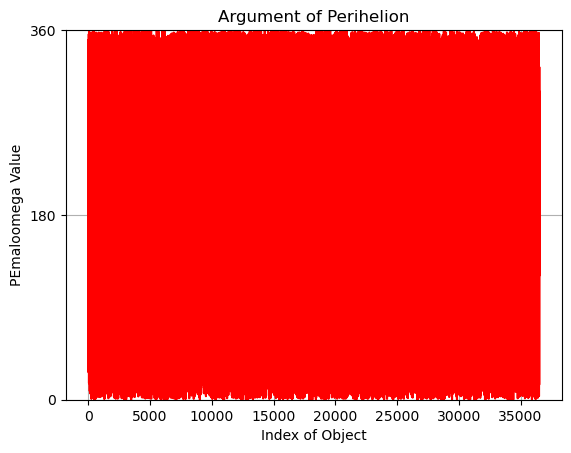

In [20]:
min_pea=min(res)
max_pea=max(res)
print(" ")
print(min_pea)
print(max_pea)
plt104.title("Argument of Perihelion")
plt104.xlabel("Index of Object")
plt104.ylabel("PEmaloomega Value")
plt104.ylim(min_pea, max_pea)
plt104.grid(True)
yticks = np104.linspace(float(min_pea), float(max_pea), 3)
plt104.yticks(yticks)
plt104.plot(res, color='r')
plt104.show()

### 2  Ascending Node           -PEvelikoOmega -degree

In [22]:
import matplotlib.pyplot as plt105
import numpy as np105
ys = [obj.PEmaloomega for obj in MylistOfSB]
res = [float(ele) for ele in ys]

 
0.0
360.0


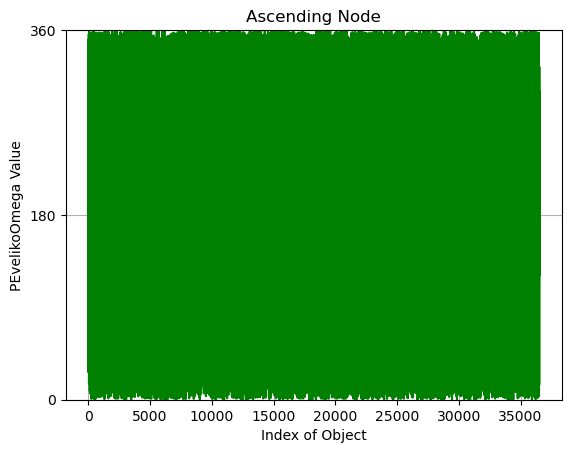

In [23]:
min_pea=min(res)
max_pea=max(res)
print(" ")
print(min_pea)
print(max_pea)
plt105.title("Ascending Node")
plt105.xlabel("Index of Object")
plt105.ylabel("PEvelikoOmega Value")
plt105.ylim(min_pea, max_pea)
plt105.grid(True)
yticks = np105.linspace(float(min_pea), float(max_pea), 3)
plt105.yticks(yticks)
plt105.plot(res, color='g')
plt105.show()

##   3  Inclination              -PEi           -degree

In [25]:
import matplotlib.pyplot as plt103
import numpy as np103
ys = [obj.PEi for obj in MylistOfSB]
res = [float(ele) for ele in ys]

 
0.0
165.6


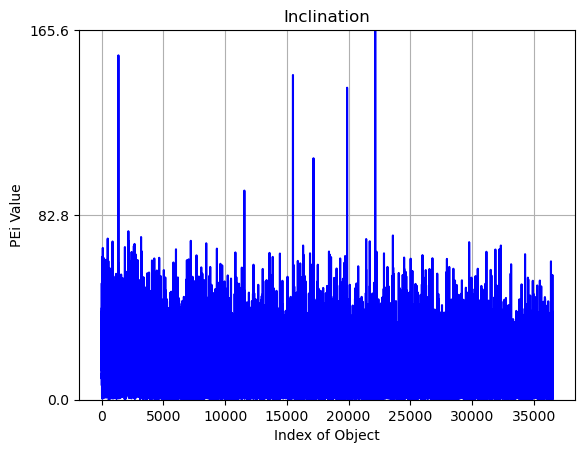

In [26]:
min_pea=min(res)
max_pea=max(res)
print(" ")
print(min_pea)
print(max_pea)
plt103.title("Inclination")
plt103.xlabel("Index of Object")
plt103.ylabel("PEi Value")
plt103.ylim(min_pea, max_pea)
plt103.grid(True)
yticks = np103.linspace(float(min_pea), float(max_pea), 3)
plt103.yticks(yticks)
plt103.plot(res, color='b')
plt103.show()

##   4 mySmallBodyTemp.PEa=row[1]   Eccentricity             -PEe           -

In [28]:
import matplotlib.pyplot as plt102
import numpy as np102
ys = [obj.PEe for obj in MylistOfSB]
res = [float(ele) for ele in ys]

 
0.0
1.0


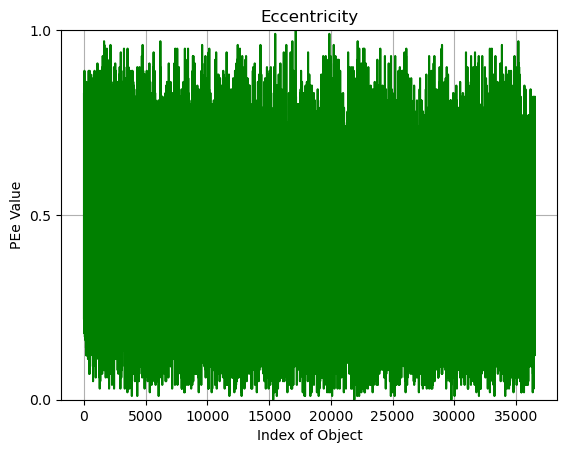

In [29]:
min_pea=min(res)
max_pea=max(res)
print(" ")
print(min_pea)
print(max_pea)
plt102.title("Eccentricity")
plt102.xlabel("Index of Object")
plt102.ylabel("PEe Value")
plt102.ylim(min_pea, max_pea)
plt102.grid(True)
yticks = np102.linspace(float(min_pea), float(max_pea), 3)
plt102.yticks(yticks)
plt102.plot(res, color='g')
plt102.show()

###5   Perihelion Distance      -PEq           -AU

In [31]:
import matplotlib.pyplot as plt108
import numpy as np108
ys = [obj.PEq for obj in MylistOfSB]
res = [float(ele) for ele in ys]

 
0.07
1.3


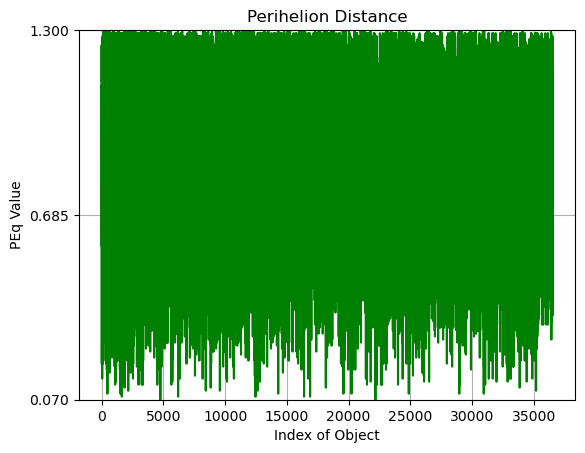

In [32]:
min_pea=min(res)
max_pea=max(res)
print(" ")
print(min_pea)
print(max_pea)
plt108.title("Perihelion Distance")
plt108.xlabel("Index of Object")
plt108.ylabel("PEq Value")
plt108.ylim(min_pea, max_pea)
plt108.grid(True)
yticks = np108.linspace(float(min_pea), float(max_pea), 3)
plt108.yticks(yticks)
plt108.plot(res, color='g')
plt108.show()

##6  Semimajor Axis           -PEa        -AU

In [34]:
import matplotlib.pyplot as plt101
import numpy as np101
ys = [obj.PEa for obj in MylistOfSB]
res = [float(ele) for ele in ys]

In [35]:
min_pea=min(res)
max_pea=max(res)
print(" ")
print(min_pea)
print(max_pea)

 
0.46
324.33


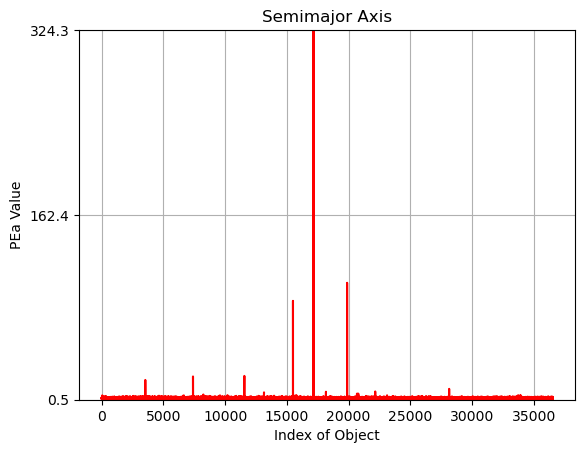

In [36]:
plt101.title("Semimajor Axis")
plt101.xlabel("Index of Object")
plt101.ylabel("PEa Value")
plt101.ylim(min_pea, max_pea)
plt101.grid(True)
yticks = np101.linspace(float(min_pea), float(max_pea), 3)
plt101.yticks(yticks)
plt101.plot(res, color='r')
plt101.show()

### 7  Mean Anomaly             -PEM           -degree

In [38]:
import matplotlib.pyplot as plt106
import numpy as np106
ys = [obj.PEM for obj in MylistOfSB]
res = [float(ele) for ele in ys]

 
0.0
360.0


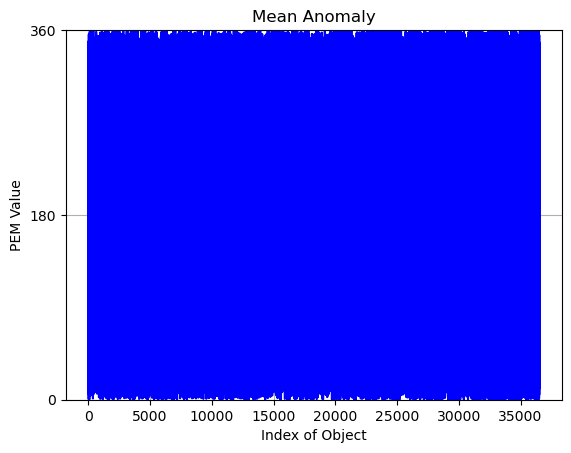

In [39]:
min_pea=min(res)
max_pea=max(res)
print(" ")
print(min_pea)
print(max_pea)
plt106.title("Mean Anomaly")
plt106.xlabel("Index of Object")
plt106.ylabel("PEM Value")
plt106.ylim(min_pea, max_pea)
plt106.grid(True)
yticks = np106.linspace(float(min_pea), float(max_pea), 3)
plt106.yticks(yticks)
plt106.plot(res, color='b')
plt106.show()

##8  Mean Daily Motion        -PEn           -degree/day   

In [41]:
import matplotlib.pyplot as plt107
import numpy as np107
ys = [obj.PEn for obj in MylistOfSB]
res = [float(ele) for ele in ys]

 
0.0
3.141


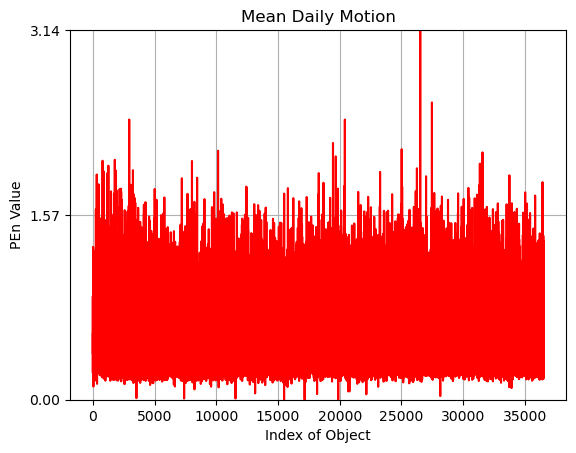

In [42]:
min_pea=min(res)
max_pea=max(res)
print(" ")
print(min_pea)
print(max_pea)
plt107.title("Mean Daily Motion")
plt107.xlabel("Index of Object")
plt107.ylabel("PEn Value")
plt107.ylim(min_pea, max_pea)
plt107.grid(True)
yticks = np107.linspace(float(min_pea), float(max_pea), 3)
plt107.yticks(yticks)
plt107.plot(res, color='r')
plt107.show()

#### 9  Aphelion Distance        -PEQ           -AU

In [44]:
import matplotlib.pyplot as plt109
import numpy as np109
ys = [obj.PEQ for obj in MylistOfSB]
res = [float(ele) for ele in ys]

 
0.65
647.41


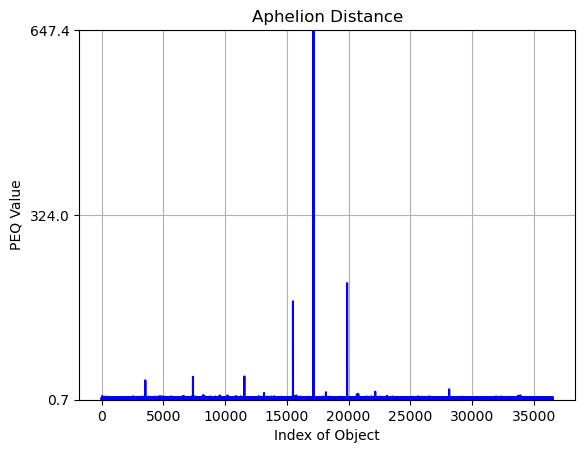

In [45]:
min_pea=min(res)
max_pea=max(res)
print(" ")
print(min_pea)
print(max_pea)
plt109.title("Aphelion Distance")
plt109.xlabel("Index of Object")
plt109.ylabel("PEQ Value")
plt109.ylim(min_pea, max_pea)
plt109.grid(True)
yticks = np109.linspace(float(min_pea), float(max_pea), 3)
plt109.yticks(yticks)
plt109.plot(res, color='b')
plt109.show()

### 10 Period                   -PEP           -years

In [47]:
import matplotlib.pyplot as plt110
import numpy as np110
ys = [obj.PEP for obj in MylistOfSB]
res = [float(ele) for ele in ys]

 
0.31
5841.0


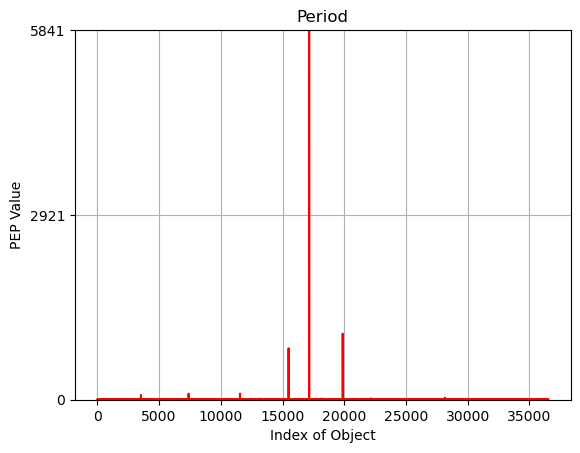

In [48]:
min_pea=min(res)
max_pea=max(res)
print(" ")
print(min_pea)
print(max_pea)
plt110.title("Period")
plt110.xlabel("Index of Object")
plt110.ylabel("PEP Value")
plt110.ylim(min_pea, max_pea)
plt110.grid(True)
yticks = np110.linspace(float(min_pea), float(max_pea), 3)
plt110.yticks(yticks)
plt110.plot(res, color='r')
plt110.show()

### 11 Absolute magnitude       -PEH           -mag

In [50]:
import matplotlib.pyplot as plt111
import numpy as np111
ys = [obj.PEH for obj in MylistOfSB]
res = [float(ele) for ele in ys]

 
0.0
100.0


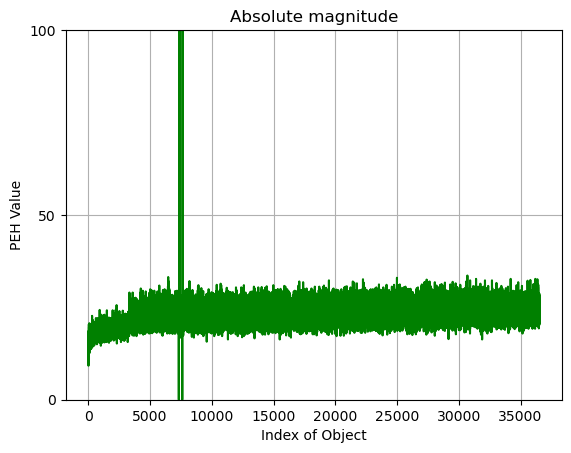

In [51]:
min_pea=min(res)
max_pea=max(res)
print(" ")
print(min_pea)
print(max_pea)
plt111.title("Absolute magnitude")
plt111.xlabel("Index of Object")
plt111.ylabel("PEH Value")
plt111.ylim(min_pea, max_pea)
plt111.grid(True)
yticks = np111.linspace(float(min_pea), float(max_pea), 3)
plt111.yticks(yticks)
plt111.plot(res, color='g')
plt111.show()

###SemiMajor Axis vs inclination

In [53]:
import matplotlib.pyplot as plt300
from scipy.stats import linregress
# Convert the data into arrays
xs = [obj.PEa for obj in MylistOfSB]
resX = [float(ele) for ele in xs]
ys = [obj.PEi for obj in MylistOfSB]
resY = [float(ele) for ele in ys]

Add labels and title

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


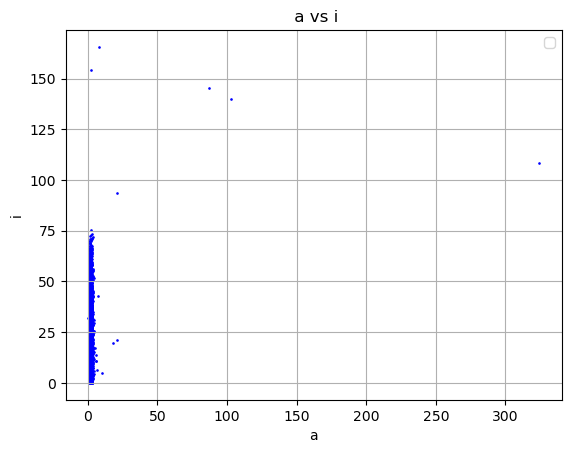

In [55]:
plt300.xlabel("a")
plt300.ylabel("i")
plt300.title(" a vs i")
plt300.legend()
# Plot the data points
plt300.scatter(resX, resY, s=0.8, color='blue', label='Data points')
# Show the plot
plt300.grid(True)
plt300.show()

### eccentricity vs inclination

In [57]:
import matplotlib.pyplot as plt300
from scipy.stats import linregress
# Convert the data into arrays
xs = [obj.PEe for obj in MylistOfSB]
resX = [float(ele) for ele in xs]
ys = [obj.PEi for obj in MylistOfSB]
resY = [float(ele) for ele in ys]

Add labels and title

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


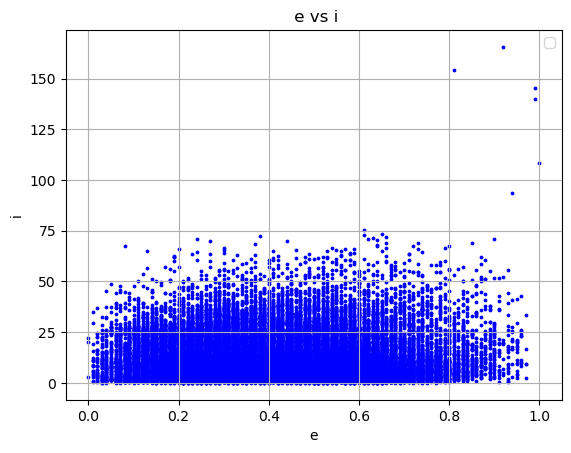

In [59]:
plt300.xlabel("e")
plt300.ylabel("i")
plt300.title(" e vs i")
plt300.legend()
# Plot the data points
plt300.scatter(resX, resY, s=3, color='blue', label='Data points')
# Show the plot
plt300.grid(True)
plt300.show()

## 4 Kategorije

In [61]:
MylistOfAmor = [copy.deepcopy(obj) for obj in MylistOfSB if float(obj.PEq) > 1.017 and float(obj.PEq) <1.3]
MylistOfApollo = [copy.deepcopy(obj) for obj in MylistOfSB if float(obj.PEq) < 1.017 and float(obj.PEa) >1]
MylistOfAtens = [copy.deepcopy(obj) for obj in MylistOfSB if float(obj.PEa) < 1 and float(obj.PEQ) >0.983]
MylistOfApohele = [copy.deepcopy(obj) for obj in MylistOfSB if float(obj.PEa) < 1 and float(obj.PEQ) < 0.983]

In [62]:
AmorApollo=0

# provera preklapanja

In [64]:
AmorAtens=0
AmorApohele=0
ApolloAtens=0
ApolloApohele=0
AtensApohele=0

In [65]:
AmorApollo = len([1 for obj in MylistOfSB if ( (float(obj.PEq) > 1.017 and float(obj.PEq) <1.3 and float(obj.PEq) < 1.017 and float(obj.PEa) >1)) ])
print(f"Amor Apollo presek: {AmorApollo}")

Amor Apollo presek: 0


In [66]:
AmorAtens = len([1 for obj in MylistOfSB if ( (float(obj.PEq) > 1.017 and float(obj.PEq) <1.3 and float(obj.PEa) < 1 and float(obj.PEQ) >0.983)) ])
print(f"Amor Atens presek: {AmorAtens}")

Amor Atens presek: 0


In [67]:
AmorApohele = len([1 for obj in MylistOfSB if ( (float(obj.PEq) > 1.017 and float(obj.PEq) <1.3 and float(obj.PEa) < 1 and float(obj.PEQ) < 0.983)) ])
print(f"Amor Apohele presek: {AmorApohele}")

Amor Apohele presek: 0


In [68]:
ApolloAtens = len([1 for obj in MylistOfSB if ( (float(obj.PEq) < 1.017 and float(obj.PEa) >1 and float(obj.PEa) < 1 and float(obj.PEQ) >0.983)) ])
print(f"Apollo Atens presek: {ApolloAtens}")

Apollo Atens presek: 0


In [69]:
ApolloApohele = len([1 for obj in MylistOfSB if ( (float(obj.PEq) < 1.017 and float(obj.PEa) >1 and float(obj.PEa) < 1 and float(obj.PEQ) < 0.983)) ])
print(f"Apollo Apohele presek: {ApolloApohele}")
                     
AtensApohele= len([1 for obj in MylistOfSB if ( (float(obj.PEa) < 1 and float(obj.PEQ) >0.983 and float(obj.PEa) < 1 and float(obj.PEQ) < 0.983)) ])
print(f"Atens Apohele presek: {AtensApohele}")

Apollo Apohele presek: 0
Atens Apohele presek: 0


## nema preklapanja .. kategorije su disjunktne

In [71]:
countAmor   =len(MylistOfAmor)
countApollo =len(MylistOfApollo)
countAtens  =len(MylistOfAtens)
countApohele=len(MylistOfApohele)

In [72]:
countPocetno=len(MylistOfSB)
countUkupno=countAmor+countApollo+countAtens+countApohele

In [73]:
print ("Count Pocetno: "+ str(countPocetno))
print ("Count Ukupno: "+ str(countUkupno))
print ("Count Ukupno minus presek: "+ str(countUkupno-AtensApohele))

Count Pocetno: 36524
Count Ukupno: 36303
Count Ukupno minus presek: 36303


### 

### eccentricity vs inclination za sve 4 kategorije

In [76]:
import matplotlib.pyplot as plt300

Convert the data into arrays

In [78]:
xs1 = [obj.PEe for obj in MylistOfAmor]
resX1 = [float(ele) for ele in xs1]
ys1 = [obj.PEi for obj in MylistOfAmor]
resY1 = [float(ele) for ele in ys1]

In [79]:
xs2 = [obj.PEe for obj in MylistOfApollo]
resX2 = [float(ele) for ele in xs2]
ys2 = [obj.PEi for obj in MylistOfApollo]
resY2 = [float(ele) for ele in ys2]

In [80]:
xs3 = [obj.PEe for obj in MylistOfAtens]
resX3 = [float(ele) for ele in xs3]
ys3 = [obj.PEi for obj in MylistOfAtens]
resY3 = [float(ele) for ele in ys3]

In [81]:
xs4 = [obj.PEe for obj in MylistOfApohele]
resX4 = [float(ele) for ele in xs4]
ys4 = [obj.PEi for obj in MylistOfApohele]
resY4 = [float(ele) for ele in ys4]

Add labels and title

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


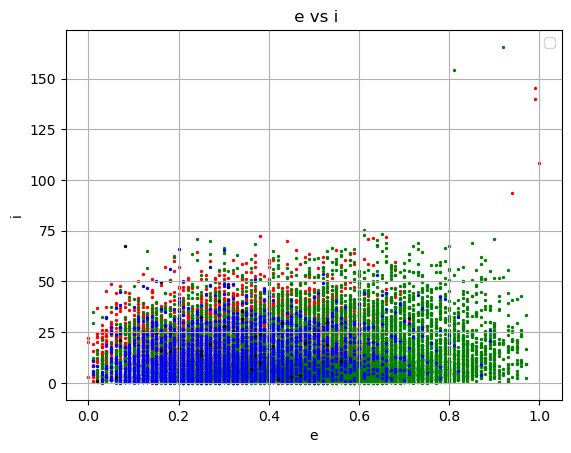

In [83]:
plt300.xlabel("e")
plt300.ylabel("i")
plt300.title(" e vs i")
plt300.legend()
# Plot the data points
##############plt300.scatter(resX, resY, s=3, color='green', label='Data points')
plt300.scatter(resX1, resY1, s=2 ,c='red', label='Amor')
plt300.scatter(resX2, resY2, s=2 ,c='green', label='Apollo')
plt300.scatter(resX3, resY3, s=2 ,c='blue', label='Atens')
plt300.scatter(resX4, resY4, s=2 ,c='black', label='Apohele')
# Show the plot
plt300.grid(True)
plt300.show()

# py to ipynb  :   p2j 008NEOzadatak36524objekataVer0.8.py